In [19]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [6]:
rf_model = joblib.load('/content/drive/MyDrive/Final Project/DataSet/random_forest_model.pkl')
gb_model = joblib.load('/content/drive/MyDrive/Final Project/DataSet/gradient_boosting_model.pkl')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/DataSet/thinking.csv') 
X = df[['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']]
y = df['Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)z


In [ ]:
rf_weight = 0.7
gb_weight = 0.3

rf_pred_proba = rf_model.predict_proba(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)


ensemble_pred_proba = (rf_pred_proba * rf_weight) + (gb_pred_proba * gb_weight)

ensemble_predictions = ensemble_pred_proba.argmax(axis=1)


In [ ]:
#metrics
accuracy = accuracy_score(y_test, ensemble_predictions)
precision = precision_score(y_test, ensemble_predictions, average='weighted')
recall = recall_score(y_test, ensemble_predictions, average='weighted')
f1 = f1_score(y_test, ensemble_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Ensemble Model Accuracy: 0.8942708333333333
Precision: 0.8954082476448105
Recall: 0.8942708333333333
F1 Score: 0.8945480746581302
Confusion Matrix:
[[10166    71    82    85    66   129   176    73    51    55    88   102
     87    95    64    43]
 [   43 10521    47    80    92    80   149    49    35    66    82    80
     73    73    58    34]
 [   63    82 10349    61    58   107   162    73    48    56    96    98
     94    72    74    27]
 [   80    79    81 10572    82   125   153    42    53    43   110    84
     62    67    49    27]
 [   46    89    69    81 10148   113   204    83    87    69   126    91
     82   101    65    53]
 [   60    72    73    82    69 10420   147    53    52    67    92    95
     91    82    51    22]
 [   66   110    74    84   115   109 10296    65    69    63    99   106
    104    98    63    72]
 [   61   110    63    79   122   123   207 10289    42    72   105    93
     91    85    52    39]
 [   57    72    65   111    90    89   226 

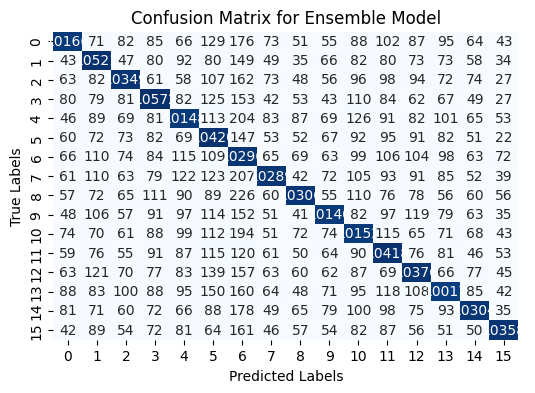

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Ensemble Model")
plt.show()


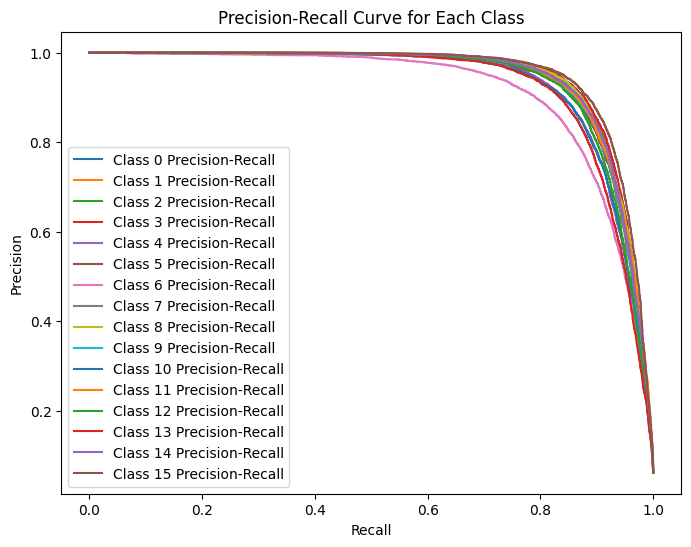

In [ ]:

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    precision_vals, recall_vals, _ = precision_recall_curve(y_test_bin[:, i], ensemble_pred_proba[:, i])
    plt.plot(recall_vals, precision_vals, label=f'Class {i} Precision-Recall')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend(loc="lower left")
plt.show()


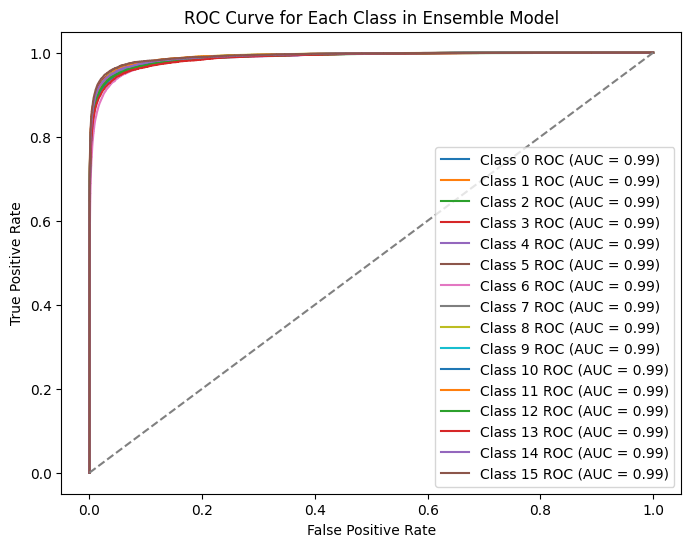

In [ ]:
#ROC
plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], ensemble_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} ROC (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class in Ensemble Model")
plt.legend(loc="lower right")
plt.show()


<ipython-input-33-4e584f83f2c6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


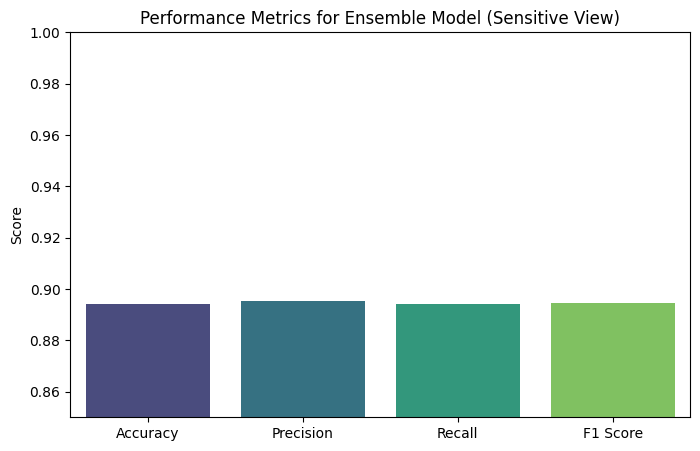

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0.85, 1)
plt.ylabel("Score")
plt.title("Performance Metrics for Ensemble Model (Sensitive View)")
plt.show()


In [34]:
import joblib

def ensemble_predict(X):
    rf_pred_proba = rf_model.predict_proba(X)
    gb_pred_proba = gb_model.predict_proba(X)
    ensemble_pred_proba = (rf_pred_proba * rf_weight) + (gb_pred_proba * gb_weight)
    return ensemble_pred_proba.argmax(axis=1)

joblib.dump(ensemble_predict, 'ensemble_model.pkl')


['ensemble_model.pkl']

In [35]:

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}


with open("ensemble_model_metrics.txt", "w") as f:
    for metric, value in metrics.items():
        f.write(f"{metric}: {value:.4f}\n")
print("Metrics saved to 'ensemble_model_metrics.txt'")


Metrics saved to 'ensemble_model_metrics.txt'
